# 국민연금공단_해외주식 투자정보_20201231

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic")
file_path='../data/stock_super.csv'
stock=pd.read_csv(file_path, encoding='CP949')
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3463 entries, 0 to 3462
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           3463 non-null   int64  
 1   종목명          3463 non-null   object 
 2   평가액(억원)      3463 non-null   float64
 3   자산군 내 비중(%)  3463 non-null   float64
 4   지분율(%)       3463 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 135.4+ KB


In [123]:
stock.head(10)

,번호,종목명,평가액(억원),자산군 내 비중(%),지분율(%)
0,1,APPLE INC,50237.39,2.61,0.20
1,2,MICROSOFT CORP,43004.50,2.23,0.24
2,3,AMAZON.COM INC,38917.92,2.02,0.22
3,4,FACEBOOK INC CLASS A,24096.60,1.25,0.34
4,5,TESLA INC,22223.83,1.15,0.31
5,6,ALPHABET INC CL C,21603.63,1.12,0.34
6,7,ALPHABET INC CL A,18555.28,0.96,0.32
7,8,TENCENT HOLDINGS LTD,18449.22,0.96,0.24
8,9,TAIWAN SEMICONDUCTOR SP ADR,15604.99,0.81,0.25
9,10,ALIBABA GROUP HOLDING SP ADR,15587.03,0.81,0.23


In [124]:
stock.describe()

,번호,평가액(억원),자산군 내 비중(%),지분율(%)
count,3463.000000,3463.000000,3463.000000,3463.000000
mean,1732.000000,547.237072,0.027626,0.186549
std,999.826318,1947.146229,0.101289,0.439109
min,1.000000,10.010000,0.000000,0.000000
25%,866.500000,24.185000,0.000000,0.050000
50%,1732.000000,61.060000,0.000000,0.110000
75%,2597.500000,379.800000,0.020000,0.220000
max,3463.000000,50237.390000,2.610000,21.210000


## 종목다 평균 투자금액

In [125]:
stock['평가액(억원)'].mean()

547.2370719029757

## - 가장 적은 금액을 투자한 종목

In [126]:
stock.sort_values(by='평가액(억원)',ascending=True)[:1]

,번호,종목명,평가액(억원),자산군 내 비중(%),지분율(%)
3462,3463,GULF BANK,10.01,0.0,0.04


##  - 총 몇개의 종목에 투자했는가?

In [127]:
stock['번호'].count()

3463

In [128]:
label=stock['평가액(억원)'].head(10)
money=label.values.tolist()
money


[50237.39,
 43004.5,
 38917.92,
 24096.6,
 22223.83,
 21603.63,
 18555.28,
 18449.22,
 15604.99,
 15587.03]

In [129]:

top_asset=stock.sort_values(by='지분율(%)',ascending=False)[:10]
top_company=top_asset['종목명']
Top_company=top_company.values.tolist()
Top_company


['ISHARES MSCI SPAIN ETF',
 'LYXOR FTSE MIB UCITS ETF',
 'LYXOR CAC 40 DR UCITS ETF',
 'ISHARES S+P/TSX 60 INDEX ETF',
 'SEAWORLD ENTERTAINMENT INC',
 'ISS A/S',
 'INCITEC PIVOT LTD',
 'TENET HEALTHCARE CORP',
 'TRADEWEB MARKETS INC CLASS A',
 'TRAVIS PERKINS PLC']

In [130]:
aa=top_asset['지분율(%)'].values.tolist()
aa

[21.21, 6.05, 5.19, 3.05, 2.97, 2.44, 2.38, 2.14, 1.91, 1.68]

## Top10 지분율 구해보기

In [131]:
company=fracs=stock['종목명'].head(10).values.tolist()
x_pos=np.arange(0,len(company),1)

[Text(0, 0, 'ISHARES MSCI SPAIN ETF'),
 Text(1, 0, 'LYXOR FTSE MIB UCITS ETF'),
 Text(2, 0, 'LYXOR CAC 40 DR UCITS ETF'),
 Text(3, 0, 'ISHARES S+P/TSX 60 INDEX ETF'),
 Text(4, 0, 'SEAWORLD ENTERTAINMENT INC'),
 Text(5, 0, 'ISS A/S'),
 Text(6, 0, 'INCITEC PIVOT LTD'),
 Text(7, 0, 'TENET HEALTHCARE CORP'),
 Text(8, 0, 'TRADEWEB MARKETS INC CLASS A'),
 Text(9, 0, 'TRAVIS PERKINS PLC')]

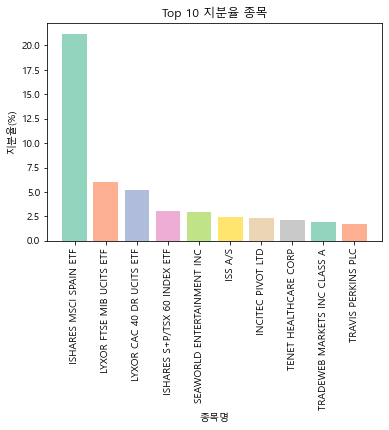

In [132]:
colors = sns.color_palette('Set2',len(company))
plt.bar(Top_company,aa,align='center', alpha=0.7,color=colors)

plt.ylabel('지분율(%)')
plt.xlabel('종목명')
plt.title('Top 10 지분율 종목')

ax=plt.subplot()
ax.set_xticks(x_pos)
ax.set_xticklabels(Top_company,rotation=90)



##  국민연금공단의 Top10 투자 종목

[Text(0, 0, 'APPLE INC'),
 Text(1, 0, 'MICROSOFT CORP'),
 Text(2, 0, 'AMAZON.COM INC'),
 Text(3, 0, 'FACEBOOK INC CLASS A'),
 Text(4, 0, 'TESLA INC'),
 Text(5, 0, 'ALPHABET INC CL C'),
 Text(6, 0, 'ALPHABET INC CL A'),
 Text(7, 0, 'TENCENT HOLDINGS LTD'),
 Text(8, 0, 'TAIWAN SEMICONDUCTOR SP ADR'),
 Text(9, 0, 'ALIBABA GROUP HOLDING SP ADR')]

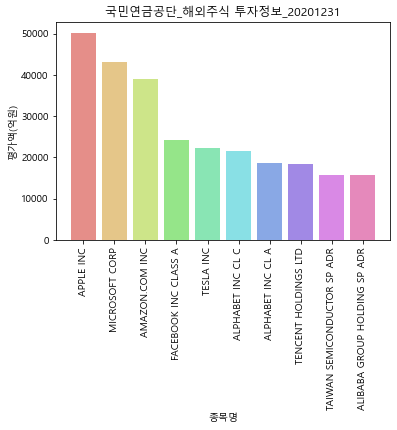

In [133]:
colors = sns.color_palette('hls',len(company))
plt.bar(company,money,align='center', alpha=0.7,color=colors)

plt.ylabel('평가액(억원)')
plt.xlabel('종목명')
plt.title('국민연금공단_해외주식 투자정보_20201231')

ax=plt.subplot()
ax.set_xticks(x_pos)
ax.set_xticklabels(company,rotation=90)

